In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
df=pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.isnull().values.any()

False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df_new=df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

In [7]:
attrition=df_new.loc[df.Attrition=='Yes']
print(len(attrition))

237


Employees in the range of 25-35 years roughly of age exhibit most slack in performance.

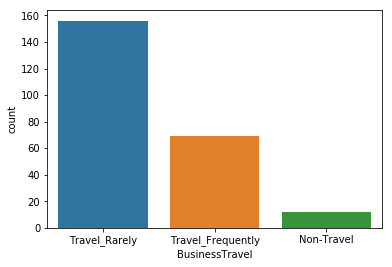

In [8]:
sns.countplot(x='BusinessTravel',data=attrition)

In [9]:
print("Complete data")
print(df_new['BusinessTravel'].value_counts(normalize=True)*100)
print("\nBusinessTravel categorical percentage when attrition=Yes")
print(attrition['BusinessTravel'].value_counts(normalize=True)*100)

Complete data
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: BusinessTravel, dtype: float64

BusinessTravel categorical percentage when attrition=Yes
Travel_Rarely        65.822785
Travel_Frequently    29.113924
Non-Travel            5.063291
Name: BusinessTravel, dtype: float64


It can be seen from the above calculation that 30% employees who show attrition travel frequently.

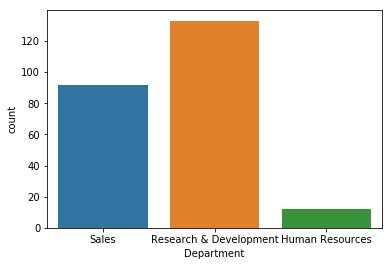

In [10]:
sns.countplot(x='Department',data=attrition)

Research and Development shows the maximum attrition level followed by Sales followed by Human Resources

In [11]:
df_new.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

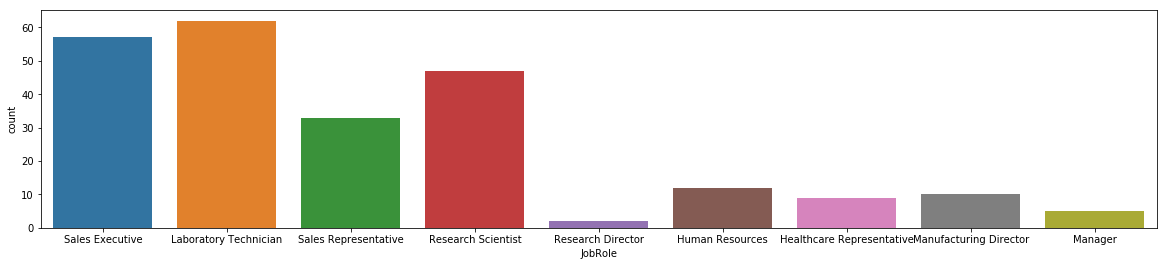

In [12]:
figure(figsize=(20,4)) 
sns.countplot(x='JobRole',data=attrition)

In [13]:
print(df.loc[df['JobRole']=='Laboratory Technician','Department'].iloc[0])
print(df.loc[df['JobRole']=='Sales Executive','Department'].iloc[0])
print(df.loc[df['JobRole']=='Research Scientist','Department'].iloc[0])

Research & Development
Sales
Research & Development


The maximum attrition rates are seen in laboratory technicians and research scientists from the research and development department and in sales executives and sales representatives from sales. This is in confirmation with the graph above which stated that the highest attrition rates were in these departments.


As seen in the graph above, there is no regular trend in the impact of commuting on the performance.

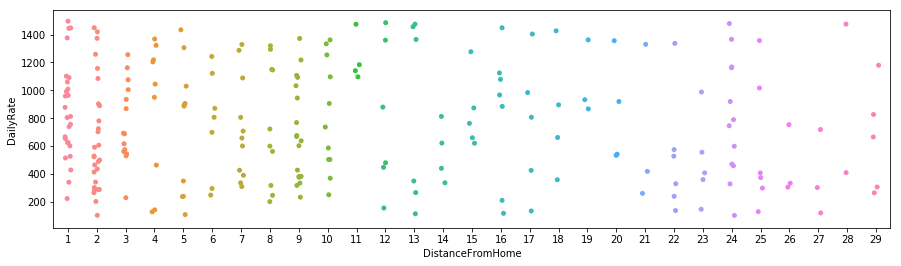

In [14]:
figure(figsize=(15,4))
sns.stripplot(x="DistanceFromHome", y="DailyRate", data=attrition,jitter=True)

There are more number of employees staying closer to the workplace and show a tendency towards higher daily rates as compared to employees living farther away. 

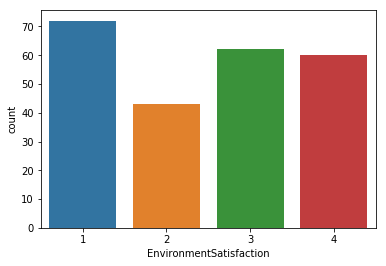

In [15]:
sns.countplot(x='EnvironmentSatisfaction',data=attrition)

Lesser environment satisfaction results in higher attrition in the lower and higher ranges. The mid range [2-3] shows an opposite trend.

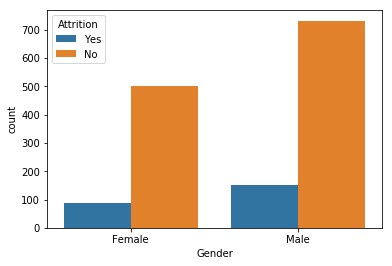

In [16]:
sns.countplot(x='Gender',data=df_new,hue='Attrition')

Attrition is predominant in men compared to women.

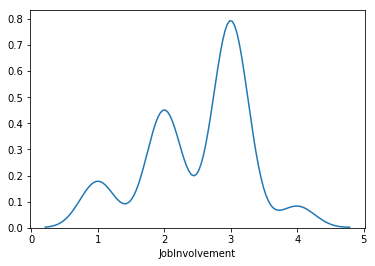

In [17]:
sns.distplot(attrition['JobInvolvement'],hist=False)

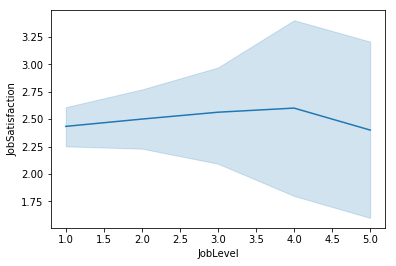

In [18]:
sns.lineplot(x='JobLevel',y='JobSatisfaction',data=attrition)

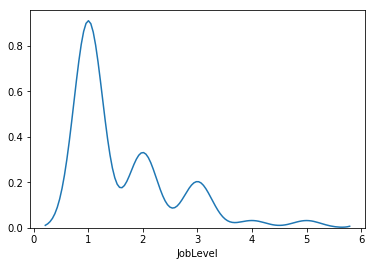

In [19]:
sns.distplot(attrition['JobLevel'],hist=False)

Higher the job level, lesser is the rate of attrition in employees.

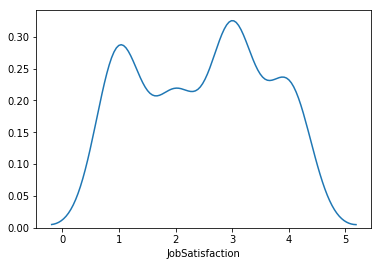

In [20]:
sns.distplot(attrition['JobSatisfaction'],hist=False)

Employees with JobInvolvement level between 2 and 3 show higher level of attrition. 
No such general trend pertaining to JobSatisfaction is seen.

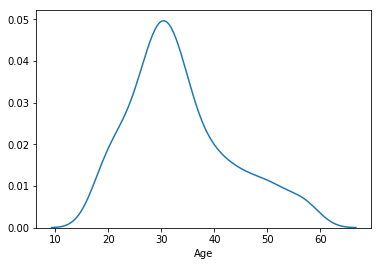

In [21]:
sns.distplot(attrition['Age'],hist=False)

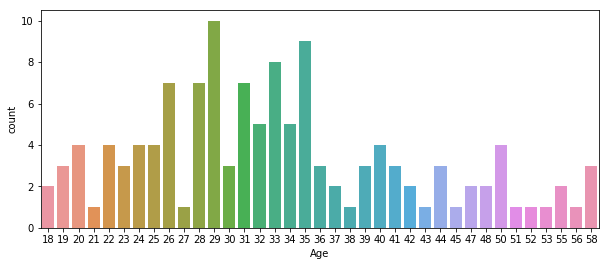

In [22]:
figure(figsize=(10,4))
overtime=attrition.loc[attrition.OverTime=='Yes']
sns.countplot(x='Age',data=overtime)

Employees in the age range of 26-35 approximately working overtime show maximum attrition.
It can therefore be concluded that attrition is predominant in this age range due to overtime work.

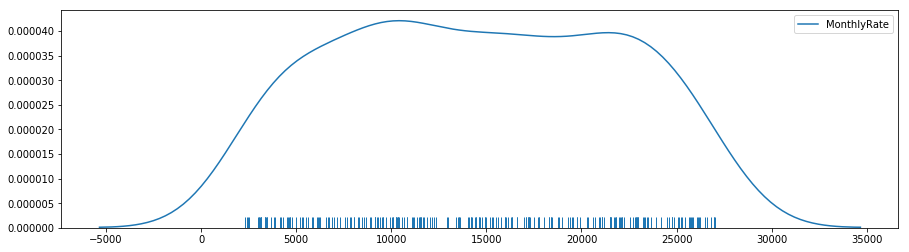

In [23]:
figure(figsize=(15,4))
sns.kdeplot(attrition['MonthlyRate'])
sns.rugplot(attrition['MonthlyRate'])

The monthly rate ranging from 7000-23000 shows higher attrition rate.

In [24]:
edjob=df_new.loc[(df.JobSatisfaction>=3) & (df.Attrition=='Yes')]
print(len(edjob))
edjob=df_new.loc[(df.JobSatisfaction<3)  & (df.Attrition=='Yes')]
print(len(edjob))

125
112


We see that despite higher job satisfaction, the number of employees with poor performance is almost equal to the numbe rof employees with lesser satisfaction. Therefore, JobSatisfaction parameter does not govern performance.

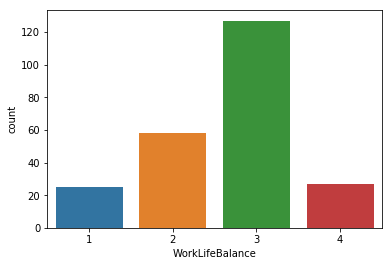

In [25]:
sns.countplot(x='WorkLifeBalance',data=attrition)

A surprising find that a on a scale of 1-4, employees with work-life balance 2 and 3 show higher attrition.


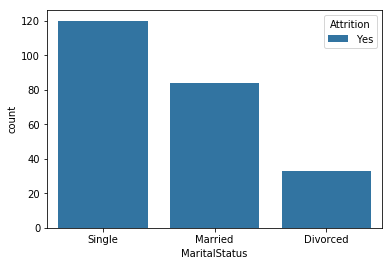

In [26]:
sns.countplot(x='MaritalStatus',data=attrition,hue='Attrition')

From the graph we see that single employees suffer from attrition more than married and divorced employees.

In [27]:
print("Single",len(attrition.loc[(attrition.MaritalStatus=='Single') & (attrition.OverTime=='Yes')]))
print("Married",len(attrition.loc[(attrition.MaritalStatus=='Married') & (attrition.OverTime=='Yes')]))
print("Divorced",len(attrition.loc[(attrition.MaritalStatus=='Divorced') & (attrition.OverTime=='Yes')]))

Single 65
Married 43
Divorced 19


This count tallies with the attrition level associated with single employees. Their overtime leads to degraded performance.

In [28]:
df_new[['TotalWorkingYears','YearsAtCompany']].head()

,TotalWorkingYears,YearsAtCompany
0,8,6
1,10,10
2,7,0
3,8,8
4,6,2


In [29]:
df_new['PastExperience']=df_new['TotalWorkingYears']-df_new['YearsAtCompany']

In [30]:
#df_new[['TotalWorkingYears','YearsAtCompany','PastExperience']]
df_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PastExperience
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,2
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,4


In [31]:
print(len(df_new.loc[(df_new.PastExperience>0) & (df_new.Attrition=='Yes')]))
print(len(df_new.loc[(df_new.PastExperience>0) & (df_new.Attrition=='No')]))

148
848


We see that employees who have past experience do not generally slack in performance.


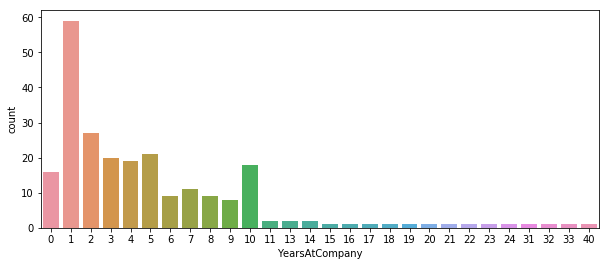

In [32]:
figure(figsize=(10,4))
sns.countplot(x='YearsAtCompany',data=attrition)

The more the number of years spent at this company causes better performance.

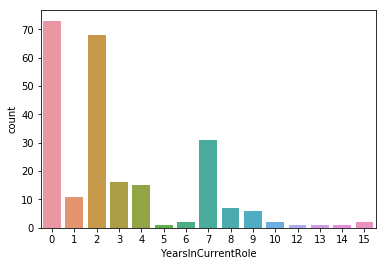

In [33]:
sns.countplot(x='YearsInCurrentRole',data=attrition)

On an average, fewer years in the current job role accounts for a higher level of performance drop.

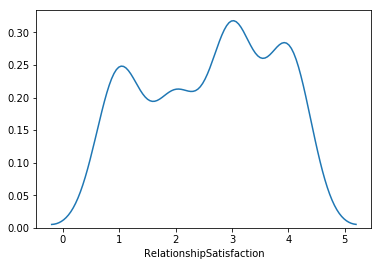

In [34]:
sns.distplot(attrition['RelationshipSatisfaction'],hist=False)

A higher relationship satisfaction on scale leads to more attrition among employees.


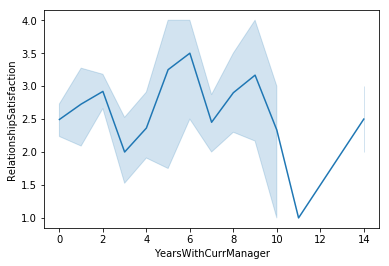

In [35]:
sns.lineplot(y='RelationshipSatisfaction',x='YearsWithCurrManager',data=attrition)

There exists no uniform trend in the years spent under the manager and his relationship with the latter.

In [36]:
print(len(df_new['OverTime']=='Yes'))
print(len(df_new['OverTime']=='No'))

print(len(attrition['OverTime']=='Yes'))
print(len(attrition['OverTime']=='No'))

1470
1470
237
237


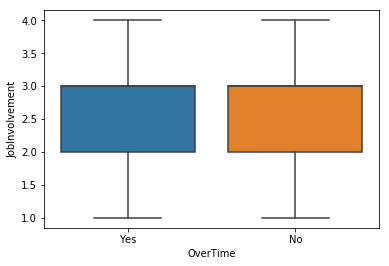

In [37]:
sns.boxplot(x='OverTime',y='JobInvolvement',data=attrition)

No conclusion can be drawn between the level of job involvement and overtime factor.

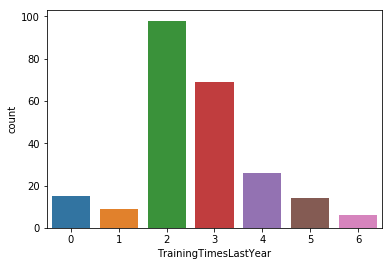

In [38]:
sns.countplot(x='TrainingTimesLastYear',data=attrition)

The number of employees suffering from attrition reduces drastically as the number of training times last year increases from 2 onwards.

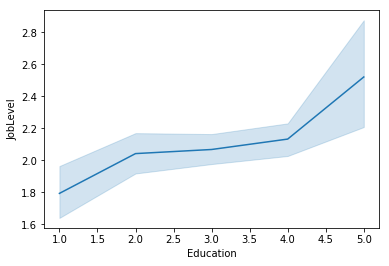

In [39]:
sns.lineplot(y='JobLevel',x='Education',data=df_new)

A linear relationship exists between education and job level.

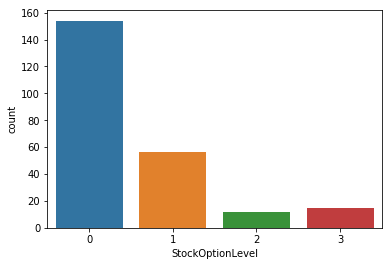

In [40]:
sns.countplot(x='StockOptionLevel',data=attrition)

Lower the stock level options, greater is the slack in performance.

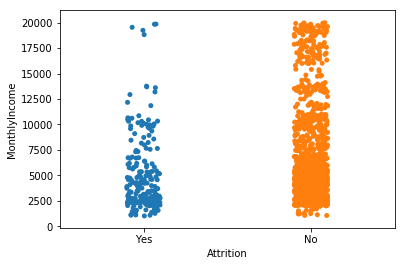

In [41]:
sns.stripplot(y='MonthlyIncome',x='Attrition',data=df_new)

It is seen that out of a small section of employees that suffer from attrition, employees with salaries below 10,000 show maximum attrition. 

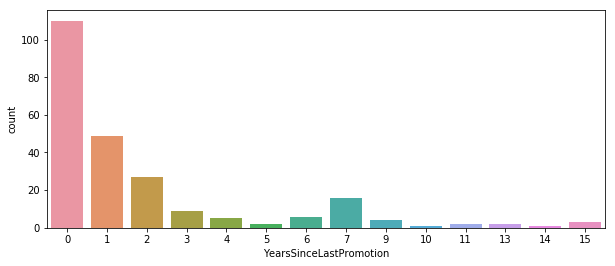

In [42]:
figure(figsize=(10,4))
sns.countplot(x='YearsSinceLastPromotion',data=attrition)

It is observed that employees with less frequent promotions fare better.

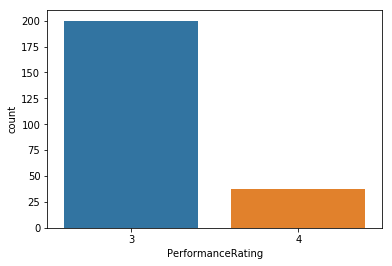

In [43]:
sns.countplot(x='PerformanceRating',data=attrition)

Employees with performance rating 3 out of 4 show degraded performance compared to employees who have full rating.

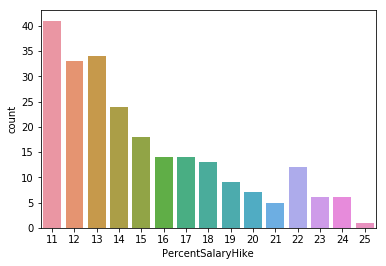

In [44]:
sns.countplot(x='PercentSalaryHike',data=attrition)

The above graph shows that greater salary hike causes better performance compared to those with poor salary hike. This shows that salary hikes and higher appreciation (performance rating) improves employee performance.

In [45]:
df_new['JobChangeRate']=df_new['PastExperience']/df_new['NumCompaniesWorked']
m = df_new.loc[df_new['JobChangeRate'] != np.inf, 'JobChangeRate'].max()
print(m)
df_new['JobChangeRate'].replace(np.inf,m,inplace=True)
df_new['JobChangeRate']

15.0


0       0.250000
1       0.000000
2       1.166667
3       0.000000
4       0.444444
          ...   
1465    3.000000
1466    0.500000
1467    0.000000
1468    4.000000
1469    1.000000
Name: JobChangeRate, Length: 1470, dtype: float64

The employees suffering from attrition are dominated by lower job change rates implying that more varying experience (higher job change rate) helps improve performance.

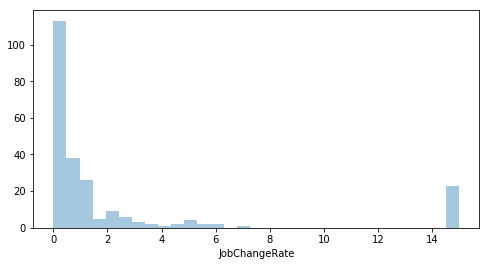

In [46]:
figure(figsize=(8,4))
a=df_new.loc[df_new.Attrition=='Yes']
sns.distplot(a['JobChangeRate'],kde=False)

As the rate of job change increases performance improves (lesser attrition). 

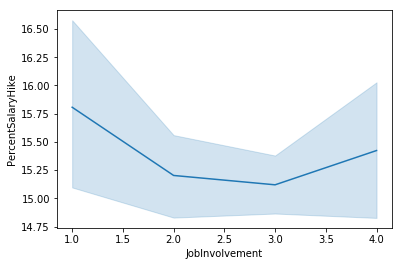

In [47]:
sns.lineplot(y='PercentSalaryHike',x='JobInvolvement',data=df_new)

The percentage in salary hike takes a dip as the job involvement level increases upto 3 and then goes up by a little amount.

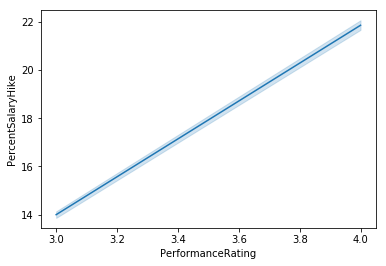

In [48]:
sns.lineplot(y='PercentSalaryHike',x='PerformanceRating',data=df_new)

A linear relationship is observed between performance rating and salary hike.